In [1]:
import os
import numpy as np

from keras.models import Sequential
from keras.layers import *

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

In [2]:
images = [[],[]]
labels = [[],[]]
i = 0
for folder_name in ['train', 'valid']:
    folder_path = os.path.join('dataset', folder_name)
    for dataset_name in os.listdir(folder_path):
        dataset_path = os.path.join(folder_path, dataset_name)
        for file_name in os.listdir(dataset_path):
            file_path = os.path.join(dataset_path, file_name)
            img = load_img(file_path, color_mode='grayscale')
            images[i].append(np.array(img))
            labels[i].append(int(dataset_name))
    
    i += 1
    
train_images = np.array(images[0])
train_labels = np.array(labels[0])
validation_images = np.array(images[1])
validation_labels = np.array(labels[1])



(5400, 50, 50)
5


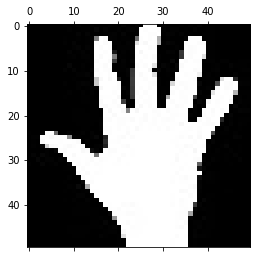

(1800, 50, 50)
3


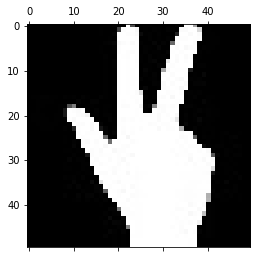

In [3]:
print(train_images.shape)
print(train_labels[5000])
plt.matshow(train_images[5000], cmap = 'gray')
plt.show()

print(validation_images.shape)
print(validation_labels[1000])
plt.matshow(validation_images[1000], cmap = 'gray')
plt.show()

In [4]:
train_images = train_images.reshape((5400, 50, 50, 1))
train_images = train_images.astype('float32')/255

validation_images = validation_images.reshape((1800, 50, 50, 1))
validation_images = validation_images.astype('float32')/255


print("Before:")
print(train_labels.shape)
print(train_labels[4000])

train_labels = to_categorical(train_labels)
validation_labels = to_categorical(validation_labels)

print("After:")
print(train_labels.shape)
print(train_labels[4000])

Before:
(5400,)
4
After:
(5400, 6)
[0. 0. 0. 0. 1. 0.]


In [14]:
model = Sequential()

model.add(Conv2D(filters = 6, kernel_size = 5, strides = 1, activation = 'relu', input_shape = (50,50,1)))
model.add(MaxPooling2D(pool_size = 2, strides = 2))

model.add(Conv2D(filters = 10, kernel_size = 5, strides = 1, activation = 'relu', input_shape = (25,25,5)))
model.add(MaxPooling2D(pool_size = 2, strides = 2))

model.add(Flatten())

model.add(Dense(units = 400, activation = 'relu'))
model.add(Dense(units = 128, activation = 'relu'))

model.add(Dense(units = 6, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [15]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 46, 46, 6)         156       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 23, 23, 6)        0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 19, 19, 10)        1510      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 9, 9, 10)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 810)               0         
                                                                 
 dense_12 (Dense)            (None, 400)              

In [16]:
model.fit(train_images, train_labels, epochs = 5, batch_size = 10, validation_data = (validation_images, validation_labels))

Epoch 1/5
540/540 [==============================] - 7s 12ms/step - loss: 0.0322 - accuracy: 0.9915 - val_loss: 1.8781e-05 - val_accuracy: 1.0000
Epoch 2/5
540/540 [==============================] - 9s 17ms/step - loss: 6.6998e-06 - accuracy: 1.0000 - val_loss: 1.1690e-05 - val_accuracy: 1.0000
Epoch 3/5
540/540 [==============================] - 9s 17ms/step - loss: 2.8057e-06 - accuracy: 1.0000 - val_loss: 7.7455e-06 - val_accuracy: 1.0000
Epoch 4/5
540/540 [==============================] - 9s 17ms/step - loss: 1.3738e-06 - accuracy: 1.0000 - val_loss: 5.0844e-06 - val_accuracy: 1.0000
Epoch 5/5
540/540 [==============================] - 9s 16ms/step - loss: 7.8060e-07 - accuracy: 1.0000 - val_loss: 3.6845e-06 - val_accuracy: 1.0000


In [17]:
model.save('model.h5')